In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------  297.0/301.2 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from sklearn.feature_selection import SelectKBest, chi2

In [5]:
data = pd.read_csv(r"C:\Users\HP\Downloads\file.csv\chatgpt sentimental analysys.csv")

In [6]:
data.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [8]:
data.shape

(219294, 3)

In [9]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
data.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [12]:
data['labels'].value_counts()

labels
bad        107796
good        56011
neutral     55487
Name: count, dtype: int64

In [13]:
vectorizer=TfidfVectorizer(stop_words='english', max_features=1000)
X= vectorizer.fit_transform(data['tweets'])

In [14]:
X.shape

(219294, 1000)

In [15]:
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(data['labels'])

In [16]:
X_train, X_temp, y_train, y_temp=train_test_split(X,y,test_size=.3,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp, y_temp, test_size=.5, random_state=42)

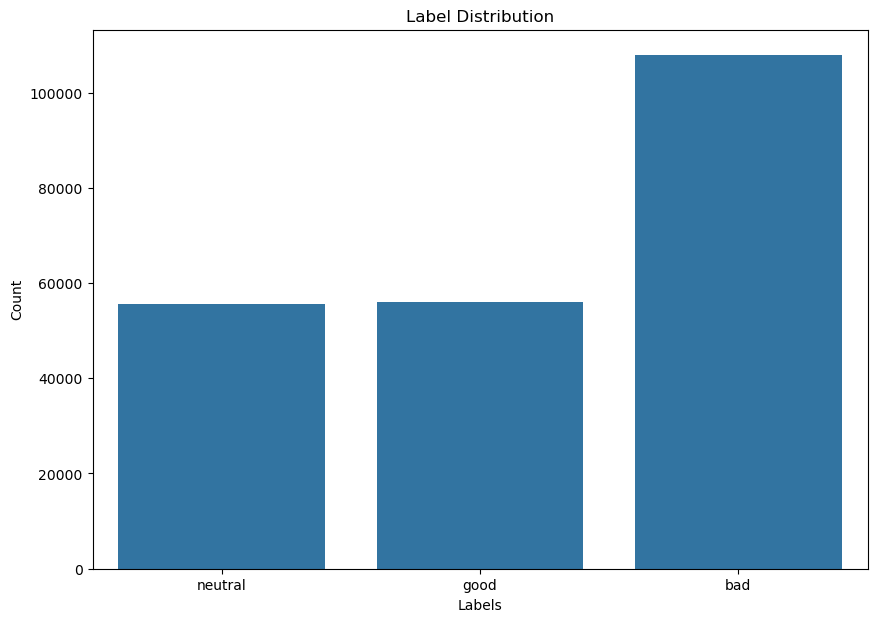

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['labels'])
plt.title("Label Distribution")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [18]:
data['text_length']=data['tweets'].apply(len)
data['text_length'].describe()

count    219294.000000
mean        144.713604
std          80.146339
min           6.000000
25%          80.000000
50%         124.000000
75%         207.000000
max         357.000000
Name: text_length, dtype: float64

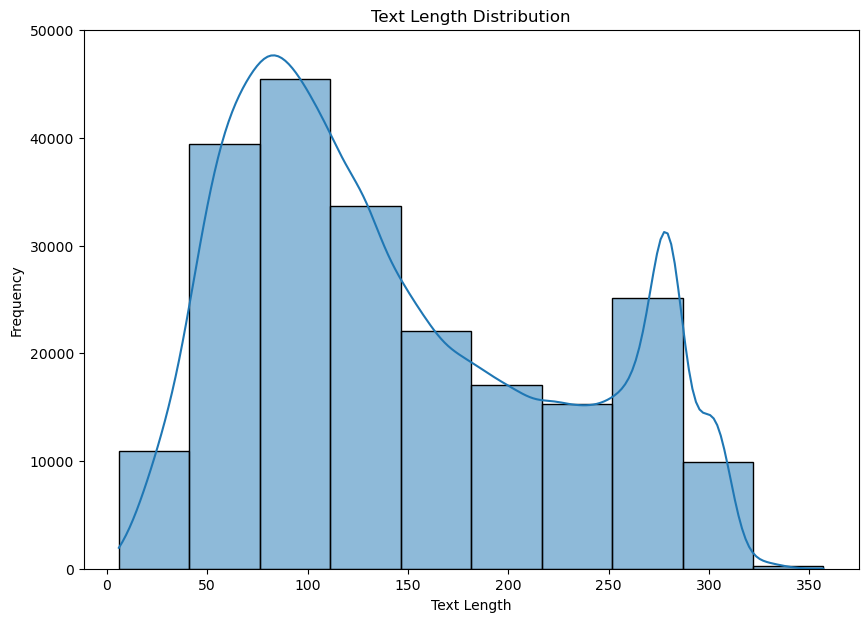

In [19]:
plt.figure(figsize=(10,7))
sns.histplot(data['text_length'], bins=10,kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [20]:
labels= data['labels'].unique()
labels

array(['neutral', 'good', 'bad'], dtype=object)

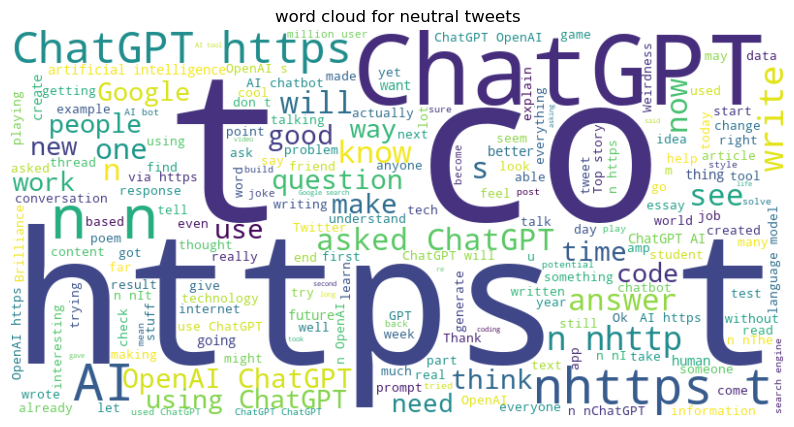

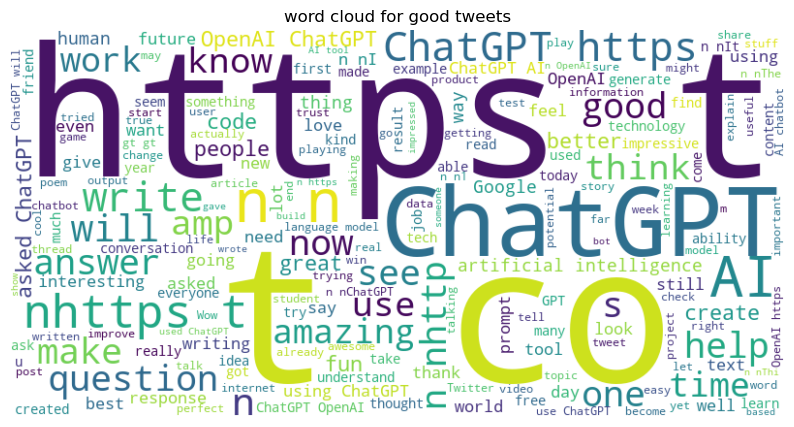

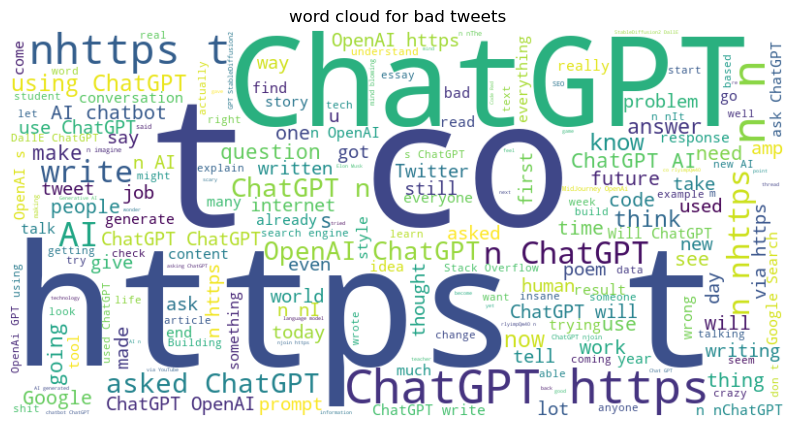

In [21]:
from wordcloud import WordCloud
for label in labels:
    subset= data[data['labels']==label]
    text = ' '.join(subset['tweets'].tolist())
    wordcloud= WordCloud(width=800,height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'word cloud for {label} tweets')
    plt.axis('off')
    plt.show()

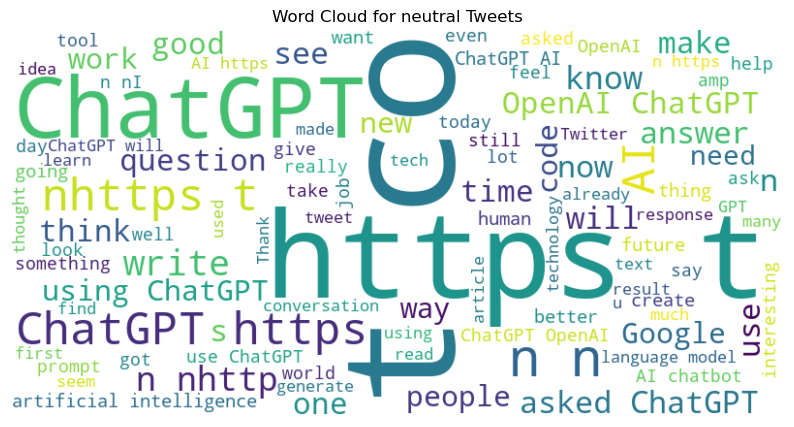

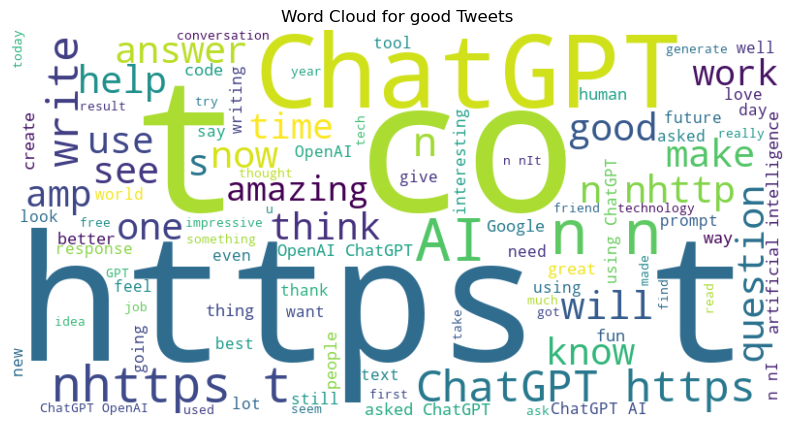

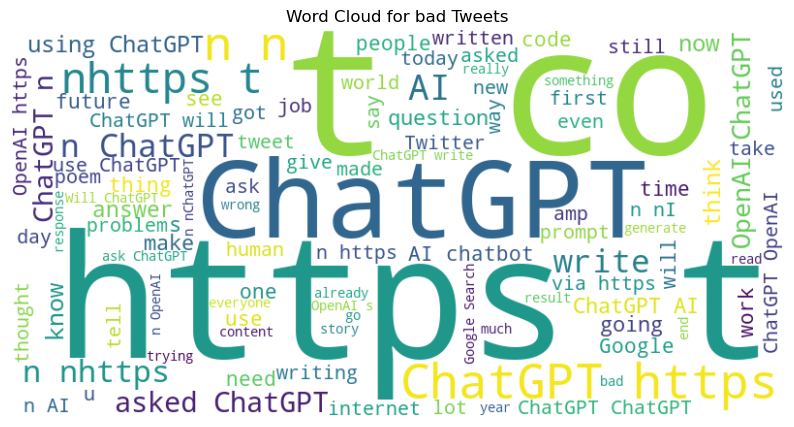

In [22]:
labels = data['labels'].unique()
for label in labels:
    subset = data[data['labels'] == label]
    text = ' '.join(subset['tweets'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label} Tweets')
    plt.axis('off')
    plt.show()

<Figure size 1000x700 with 0 Axes>

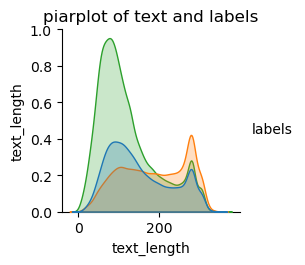

Label names: ['bad' 'good' 'neutral']


In [23]:
data['label_encoded']=label_encoder.fit_transform(data['labels'])
plt.figure(figsize=(10,7))
sns.pairplot(data, hue='labels', vars=['text_length'])
plt.title('piarplot of text and labels')
plt.show()
print(f"Label names: {label_encoder.classes_}")

In [24]:
data

,tweets,labels,text_length,label_encoded
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,80,2
1,"Try talking with ChatGPT, our new AI system wh...",good,139,1
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,264,2
3,"THRILLED to share that ChatGPT, our new model ...",good,188,1
4,"As of 2 minutes ago, @OpenAI released their ne...",bad,139,0
...,...,...,...,...
219289,Other Software Projects Are Now Trying to Repl...,bad,83,0
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good,238,1
219291,chatgpt is being disassembled until it can onl...,bad,57,0
219292,2023 predictions by #chatGPT. Nothing really s...,bad,173,0


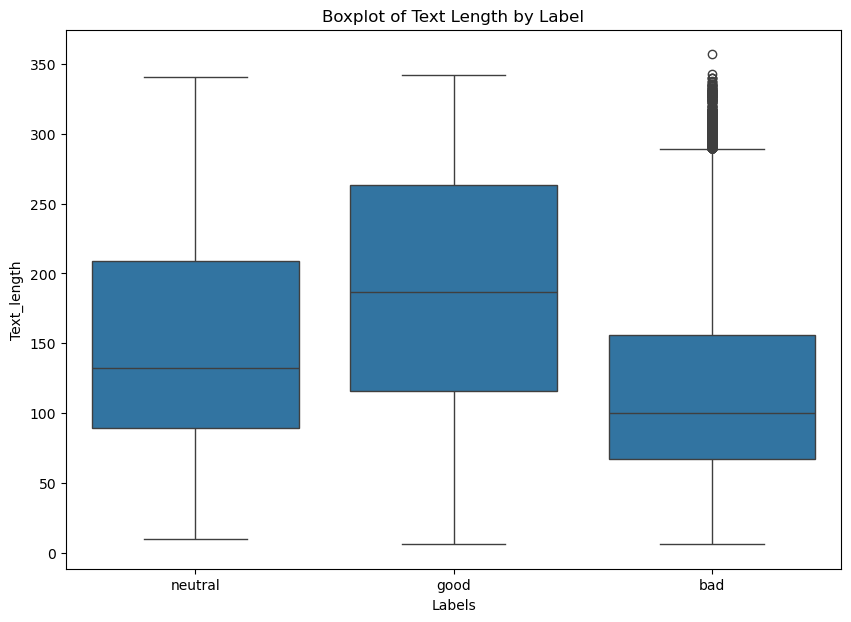

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(x='labels',y='text_length',data=data)
plt.title('Boxplot of Text Length by Label')
plt.xlabel('Labels')
plt.ylabel('Text_length')
plt.show()

In [26]:
data['text_length'] = data['tweets'].apply(len)
data['word_count'] = data['tweets'].apply(lambda x: len(x.split()))
data['avg_word_length'] = data['tweets'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Adjust max_features based on dataset size
X_tfidf = vectorizer.fit_transform(data['tweets'])

In [28]:
# Convert the sparse matrix to a DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Combine TF-IDF features with newly created features
X_combined = pd.concat([X_tfidf_df, data[['text_length', 'word_count', 'avg_word_length']]], axis=1)

# Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['labels'])

# Reduce dimensionality if required (select top 100 features)
selector = SelectKBest(score_func=chi2, k=100)
X_reduced = selector.fit_transform(X_combined, y)

In [29]:
print("Shape of TF-IDF features:", X_tfidf_df.shape)
print("Shape of combined features:", X_combined.shape)
print("Shape of reduced features:", X_reduced.shape)

Shape of TF-IDF features: (219294, 1000)
Shape of combined features: (219294, 1003)
Shape of reduced features: (219294, 100)


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [31]:
MAX_NB_WORDS = 50000  # Maximum number of words to be used (top 50,000 words)
MAX_SEQUENCE_LENGTH = 250  # Max length of input sequences (tweets)
EMBEDDING_DIM = 100  # Embedding dimensions for word vectors

In [32]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(data['tweets'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 284178 unique tokens.


In [33]:
X = tokenizer.texts_to_sequences(data['tweets'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (219294, 250)


In [34]:
Y = pd.get_dummies(data['labels']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (219294, 3)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(197364, 250) (197364, 3)
(21930, 250) (21930, 3)


In [36]:
197364+21930

219294

In [37]:
model = Sequential()
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes (good, neutral, bad)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 250, 100)            │       5,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 250, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200)                 │         160,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             603 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,161,403 (19.69 MB)

 Trainable params: 5,161,403 (19.69 MB)

 Non-trainable params: 0 (0.00 B)

None


In [39]:
history = model.fit(X_train, Y_train, epochs=4, batch_size=64, validation_data=(X_val, Y_val), verbose=1)

Epoch 1/4
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 2672s 864ms/step - accuracy: 0.7577 - loss: 0.5781 - val_accuracy: 0.9045 - val_loss: 0.2664
Epoch 2/4
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 3263s 1s/step - accuracy: 0.9214 - loss: 0.2273 - val_accuracy: 0.9231 - val_loss: 0.2191
Epoch 3/4
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 2754s 893ms/step - accuracy: 0.9435 - loss: 0.1647 - val_accuracy: 0.9298 - val_loss: 0.1970
Epoch 4/4
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 2513s 815ms/step - accuracy: 0.9540 - loss: 0.1323 - val_accuracy: 0.9293 - val_loss: 0.2045


In [40]:
score = model.evaluate(X_val, Y_val, verbose=0)
print('Validation Loss:', score[0])
print('Validation Accuracy:', score[1])

Validation Loss: 0.204508975148201
Validation Accuracy: 0.9293205738067627


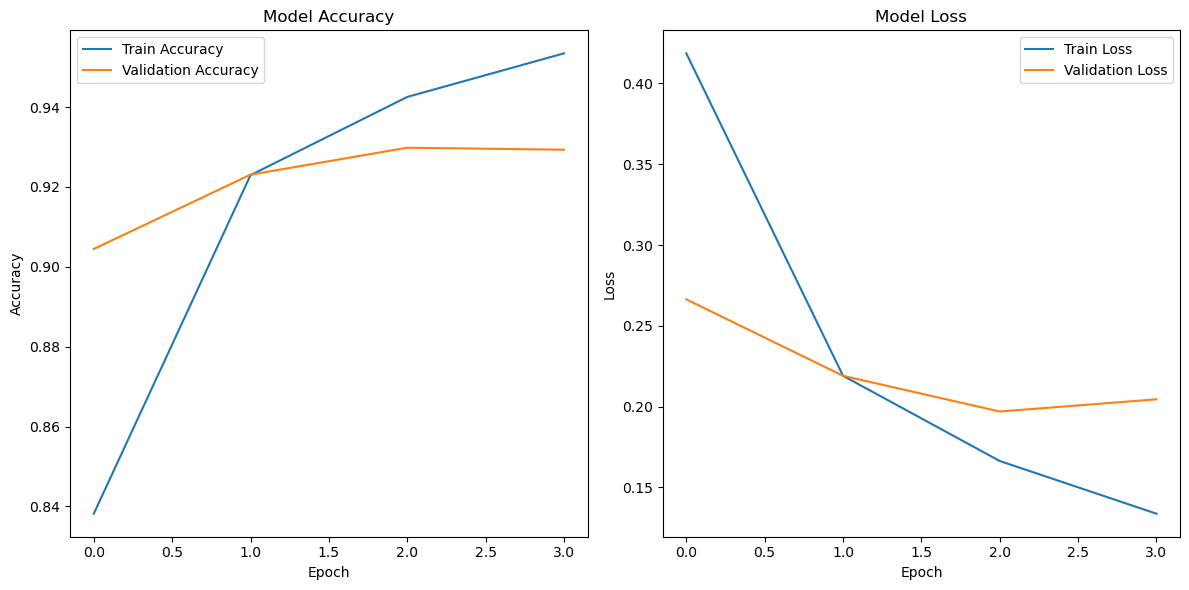

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()